# - Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# 1. Initial Data Understanding :
 - Data Loading 
 - Data Type 
 - Missing Values
 - Duplicates
 --------------------
 - Reading File and Loading :

In [2]:
MetaData = pd.read_excel(r"..\MetaData\MetaData.xlsx")
MetaData.to_csv(r"..\MetaData\MetaData.csv")


In [3]:
DF_Row = pd.read_csv(r"..\train_data.csv", low_memory= False)
Test_Row = pd.read_csv(r"..\test_data.csv")

# To Show all The Columns 
pd.set_option("display.max_columns", None)

# Make a copy for Cleaning (Deep Copy)
DF = DF_Row.copy()
DF_Test = Test_Row.copy()

# Target : 
DF_y = DF["contest-tmp2m-14d__tmp2m"]
DF_X = DF.drop(columns="contest-tmp2m-14d__tmp2m")

----------------
- The First 5 Rows :

In [4]:
DF_X.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

In [5]:
DF_Test.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

-----------
- Shape Of The DataSet : 

In [6]:
DF_X.shape

(375734, 245)

In [7]:
DF_Test.shape

(31354, 245)

In [8]:
DF_y.shape

(375734,)

----------


- As we can see the column "index" we dont need it so i'm gonna drop it :

In [9]:
DF_X.drop(columns="index", inplace= True)

In [10]:
DF_Test.drop(columns="index", inplace= True)

--------------
- Check Shapes : 

In [11]:
print(f"The Shape of The Data Frame : {DF_X.shape}\n")

The Shape of The Data Frame : (375734, 244)



In [12]:
print(f"The Shape of The Test : {DF_Test.shape}\n")

The Shape of The Test : (31354, 244)



------------
- Information About The DataSet : 

In [13]:
DF_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 244 entries, lat to wind-vwnd-925-2010-20
dtypes: float64(239), int64(3), object(2)
memory usage: 699.5+ MB


In [14]:
DF_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 244 entries, lat to wind-vwnd-925-2010-20
dtypes: float64(241), int64(1), object(2)
memory usage: 58.4+ MB


------------
- The Data Type of each Columns :

In [15]:
DF.dtypes

index                                   int64
lat                                   float64
lon                                   float64
startdate                              object
contest-pevpr-sfc-gauss-14d__pevpr    float64
                                       ...   
wind-vwnd-925-2010-16                 float64
wind-vwnd-925-2010-17                 float64
wind-vwnd-925-2010-18                 float64
wind-vwnd-925-2010-19                 float64
wind-vwnd-925-2010-20                 float64
Length: 246, dtype: object

-----------
- lets get the Data Type Of Each Columns in a csv file and read them all :

In [16]:
DF.dtypes.to_csv(r"..\MetaData\Column's_DataTypes.csv")

-----------------
- Count Null Values : 

In [17]:
DF_X.isnull().sum()

lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
nmme0-tmp2m-34w__cancm30              0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 244, dtype: int64

- lets get the NULL Values Of Each Columns in a csv file and read them all : 


In [18]:
DF_X.isnull().sum().to_csv(r"..\MetaData\Null_Values.csv")


- "Show Only the Coulmns That Contain Null" :

In [19]:
Null = DF_X.isnull().sum()
Null[Null>0]

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

-------------
- Visualize The NULL Value :

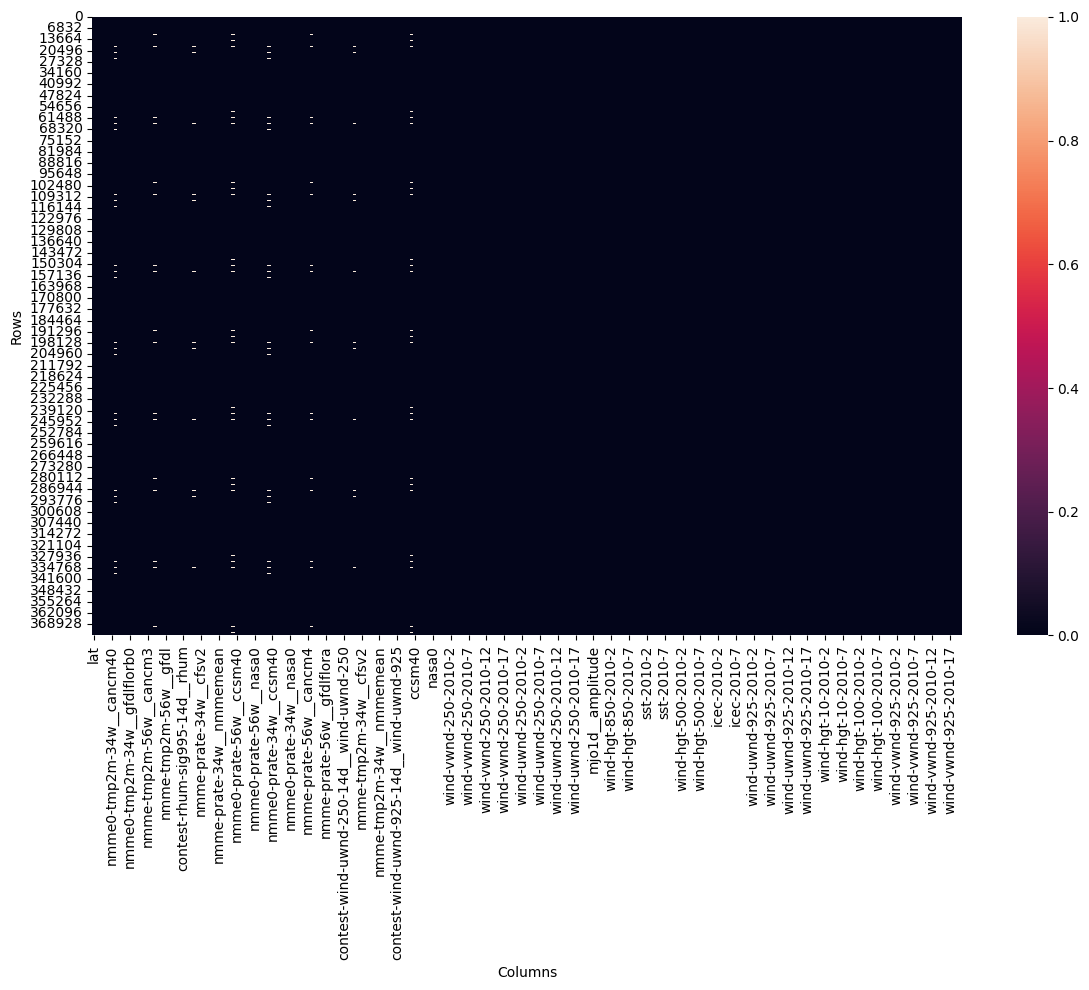

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(DF_X.isnull())
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

- Handle Null Values : 

In [21]:
DF_X['nmme0-prate-34w__ccsm30'] = DF_X['nmme0-prate-34w__ccsm30'].fillna(DF_X['nmme0-prate-34w__ccsm30'].mean())
DF_X['nmme0-tmp2m-34w__ccsm30'] = DF_X['nmme0-tmp2m-34w__ccsm30'].fillna(DF_X['nmme0-tmp2m-34w__ccsm30'].mean())
DF_X['ccsm30'] = DF_X['ccsm30'].fillna(DF_X['ccsm30'].mean())
DF_X['nmme0-prate-56w__ccsm30'] = DF_X['nmme0-prate-56w__ccsm30'].fillna(DF_X['nmme0-prate-56w__ccsm30'].mean())
DF_X['nmme-tmp2m-56w__ccsm3'] = DF_X['nmme-tmp2m-56w__ccsm3'].fillna(DF_X['nmme-tmp2m-56w__ccsm3'].mean())
DF_X['nmme-prate-56w__ccsm3'] = DF_X['nmme-prate-56w__ccsm3'].fillna(DF_X['nmme-prate-56w__ccsm3'].mean())
DF_X['nmme-tmp2m-34w__ccsm3'] = DF_X['nmme-tmp2m-34w__ccsm3'].fillna(DF_X['nmme-tmp2m-34w__ccsm3'].mean())
DF_X['nmme-prate-34w__ccsm3'] = DF_X['nmme-prate-34w__ccsm3'].fillna(DF_X['nmme-prate-34w__ccsm3'].mean())

- ReChecking Null Values :

In [22]:
Null1 = DF_X.isnull().sum()
Null1[Null>0]

nmme0-tmp2m-34w__ccsm30    0
nmme-tmp2m-56w__ccsm3      0
nmme-prate-34w__ccsm3      0
nmme0-prate-56w__ccsm30    0
nmme0-prate-34w__ccsm30    0
nmme-prate-56w__ccsm3      0
nmme-tmp2m-34w__ccsm3      0
ccsm30                     0
dtype: int64

- ReVisualize the NULL Value : 

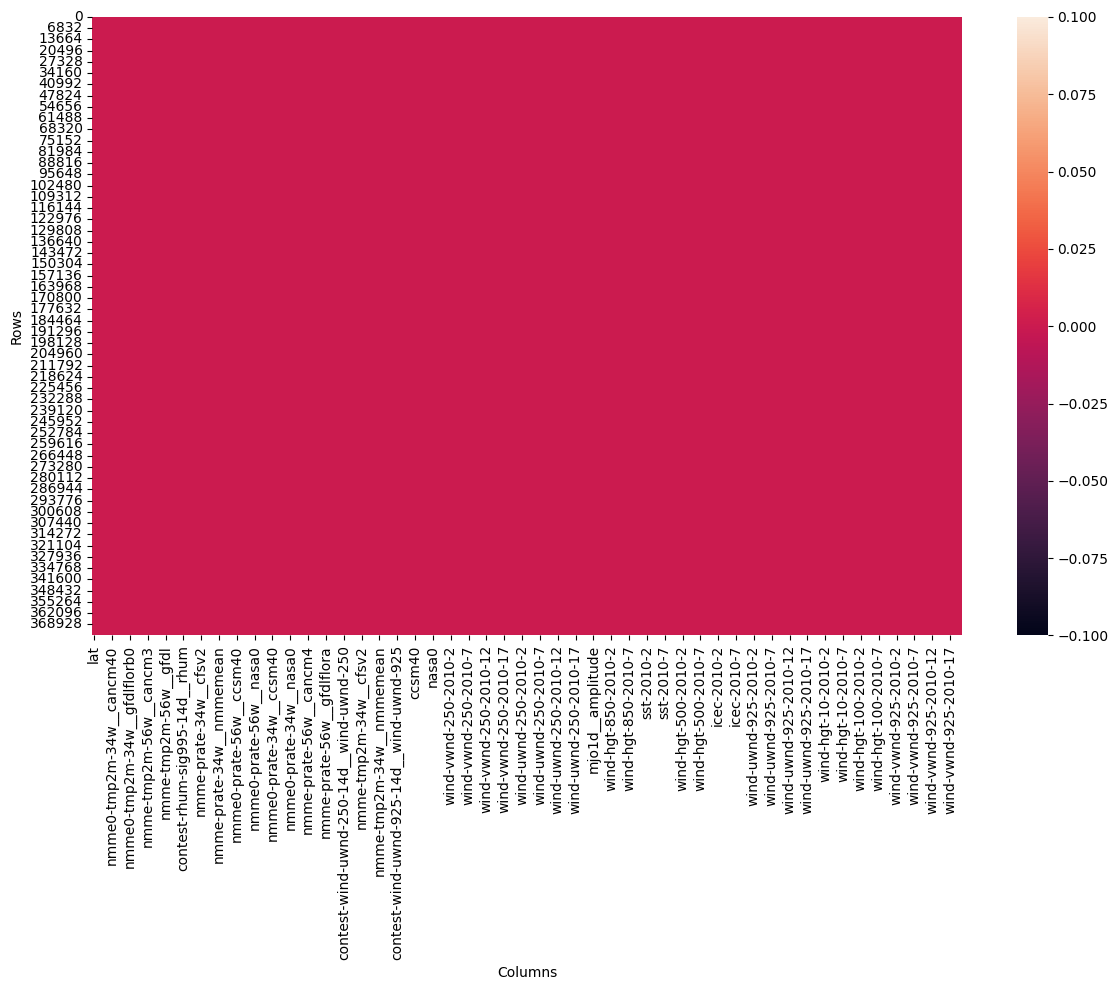

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(DF_X.isnull())
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

---------------
- Count Duplicate  :

In [24]:
DF_X.duplicated().sum()

np.int64(0)

In [25]:
# To Make Sure :
DF_X.drop_duplicates(inplace= True)

# 2. Basic Statistical Overview :


- Describe() For Numerical Columns :

In [26]:
DF_X.describe()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8,wind-


- Describe() for Target Column :

In [27]:
DF_y.describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

-------------
- Visualize The Target Column :

<function matplotlib.pyplot.show(close=None, block=None)>

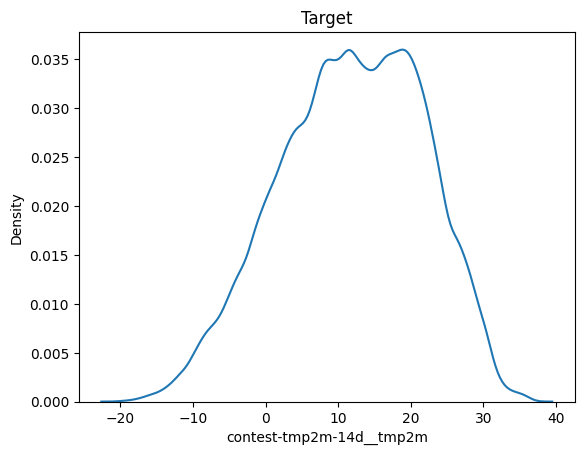

In [28]:
sns.kdeplot(DF_y)
plt.title("Target")
plt.show

<Axes: ylabel='contest-tmp2m-14d__tmp2m'>

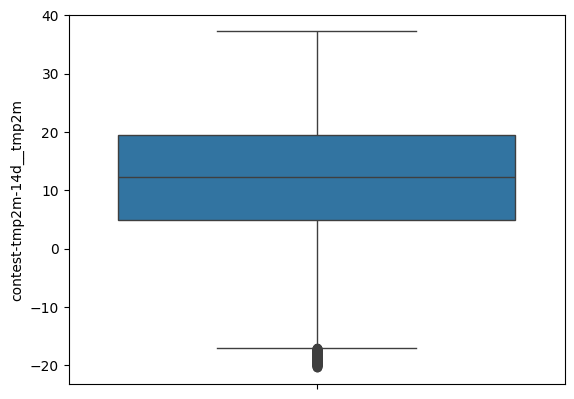

In [29]:
sns.boxplot(DF_y)

Text(0.5, 1.0, 'Distribution OF The Target Variable')

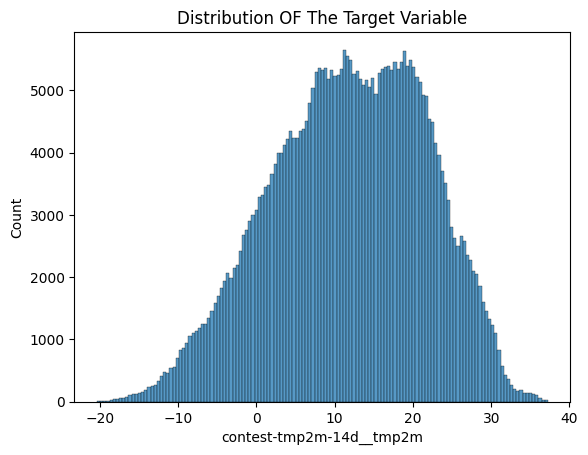

In [30]:
sns.histplot(DF_y)
plt.title("Distribution OF The Target Variable")

-----------
- Describe() For Categorical Columns :

In [31]:
DF_X.select_dtypes(include="object").describe()

,startdate,climateregions__climateregion
count,375734,375734
unique,731,15
top,9/1/14,BSk
freq,514,139621


<Axes: xlabel='count', ylabel='climateregions__climateregion'>

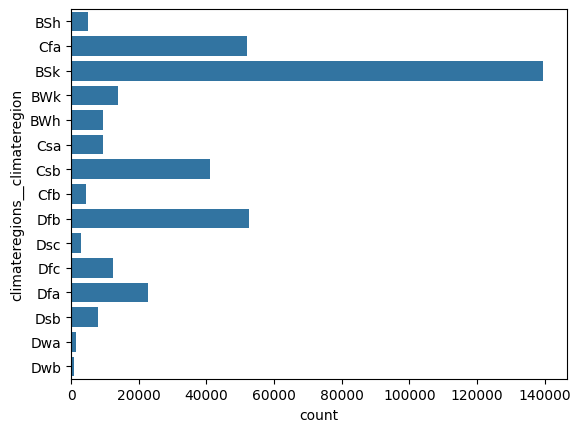

In [32]:
sns.countplot(DF_X["climateregions__climateregion"])


- BSh: Hot semi-arid climate

- BSk: Cold semi-arid climate

- BWh: Hot desert climate

- BWk: Cold desert climate

- Cfa: Humid subtropical climate

- Cfb: Temperate oceanic climate or subtropical highland climate

- Csa: Hot-summer Mediterranean climate

- Csb: Warm-summer Mediterranean climate

- Dfa: Hot-summer humid continental climate

- Dfb: Warm-summer humid continental climate

- Dfc: Subarctic climate

- Dsb: Mediterranean-influenced warm-summer humid continental climate

- Dsc: Mediterranean-influenced subarctic climate

- Dwa: Monsoon-influenced hot-summer humid continental climate

- Dwb: Monsoon-influenced warm-summer humid continental climate

## 3. Distribution Of Variables  :

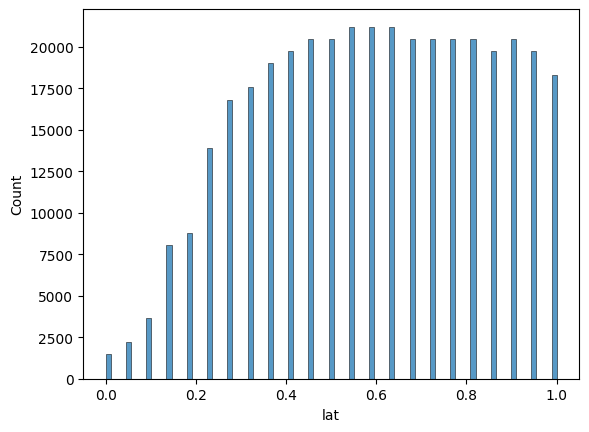

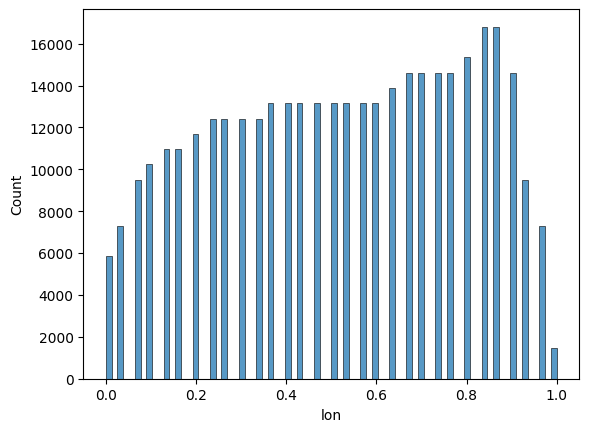

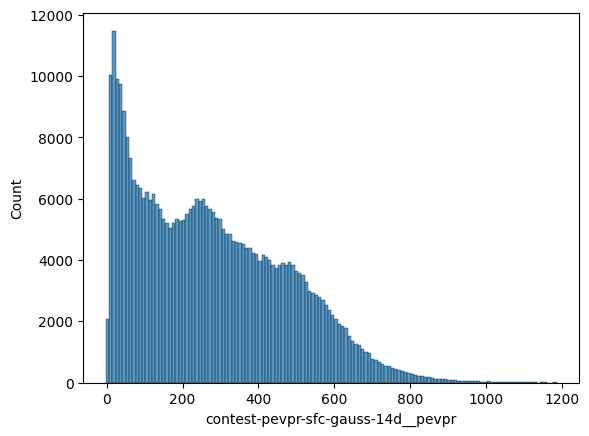

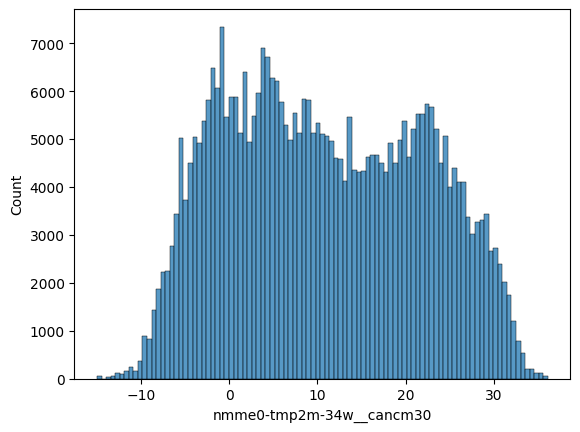

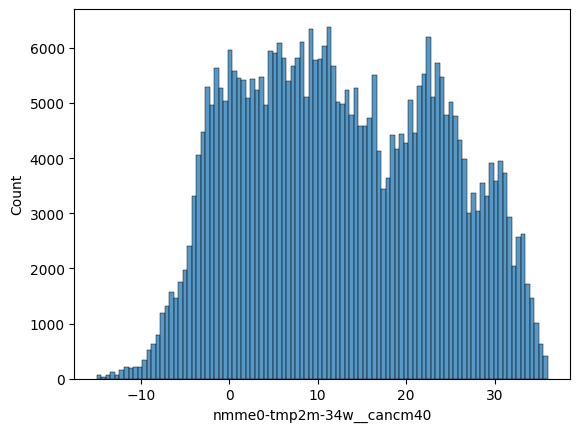

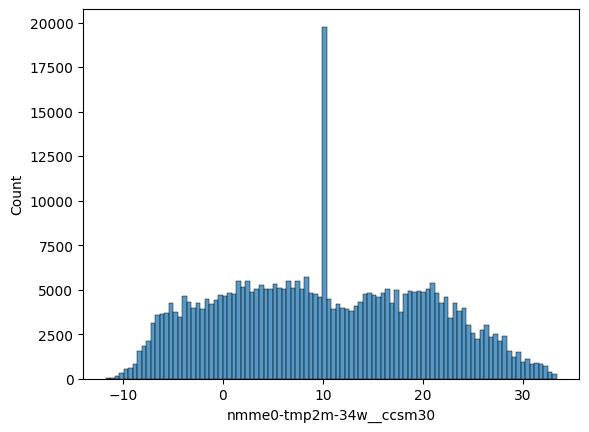

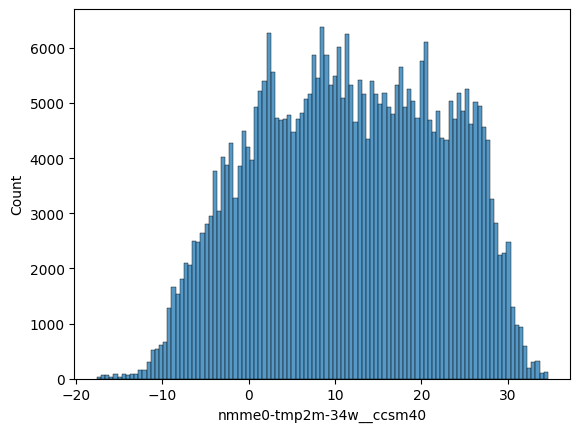

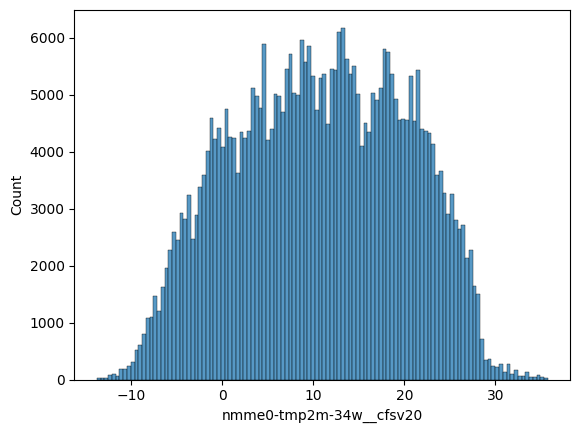

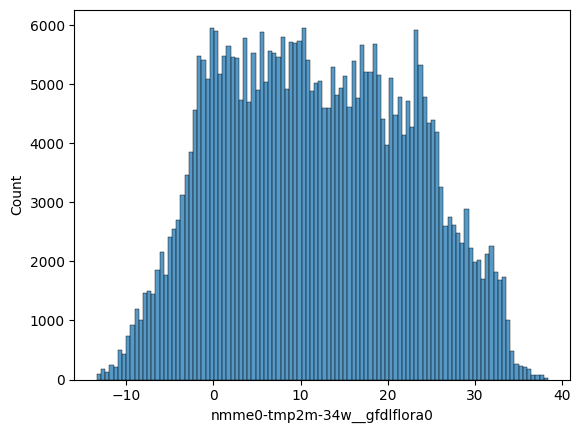

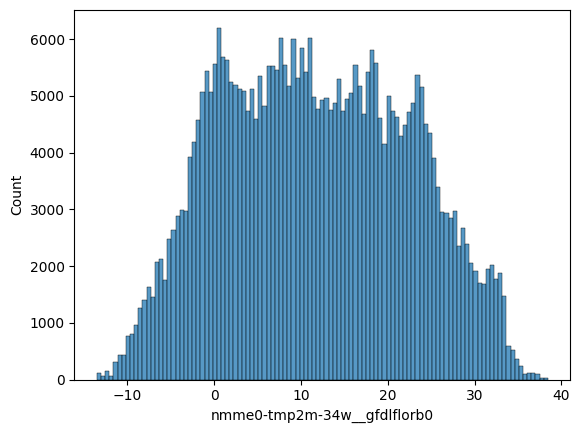

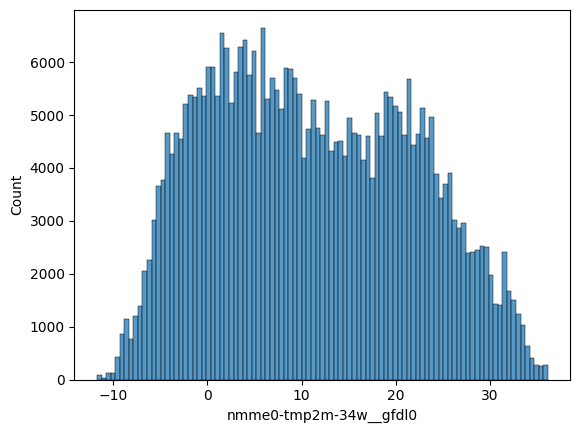

<Figure size 640x480 with 0 Axes>

In [33]:
# For The First 10 Columns "cause we got a lot of columns so i'm gonna show a sample": 
for i,Col in enumerate(DF_X.select_dtypes('number').columns):
    sns.histplot(DF_X[Col])
    plt.show() 
    if i == 10:
        break

plt.tight_layout()
plt.show()    

# 4. Correlations :

-  Multicollinearity : 
 
-   Drop high cardinality columns ie columns with more than 5000 unique values except for the target variable
-   We have dropped the columns with high multicollinearity because multicollinearity can cause problems in the interpretation of regression coefficients. It can also cause problems in the model itself, such as making the variance of the regression coefficients unstable, which can cause the model to break down when new data are added.

In [34]:
for Col in DF_X.columns : 
    if DF_X[Col].nunique() > 5000 and Col != "contest-tmp2m-14d__tmp2m" : 
        DF_X.drop(Col , axis= 1 , inplace= True)        

In [35]:
DF_X.shape

(375734, 200)

In [36]:
Correlations = DF_X.select_dtypes("number").corr()

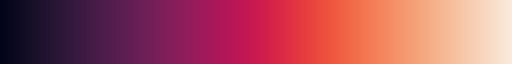

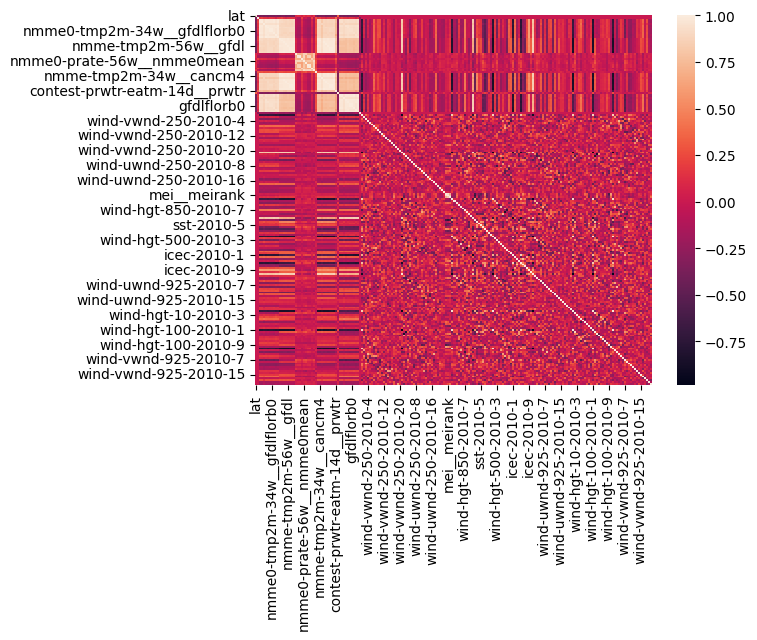

In [37]:
sns.heatmap(Correlations)
sns.color_palette("rocket", as_cmap=True)           # Did This After Back to Seaborn doc

# 5. Feature Interaction :

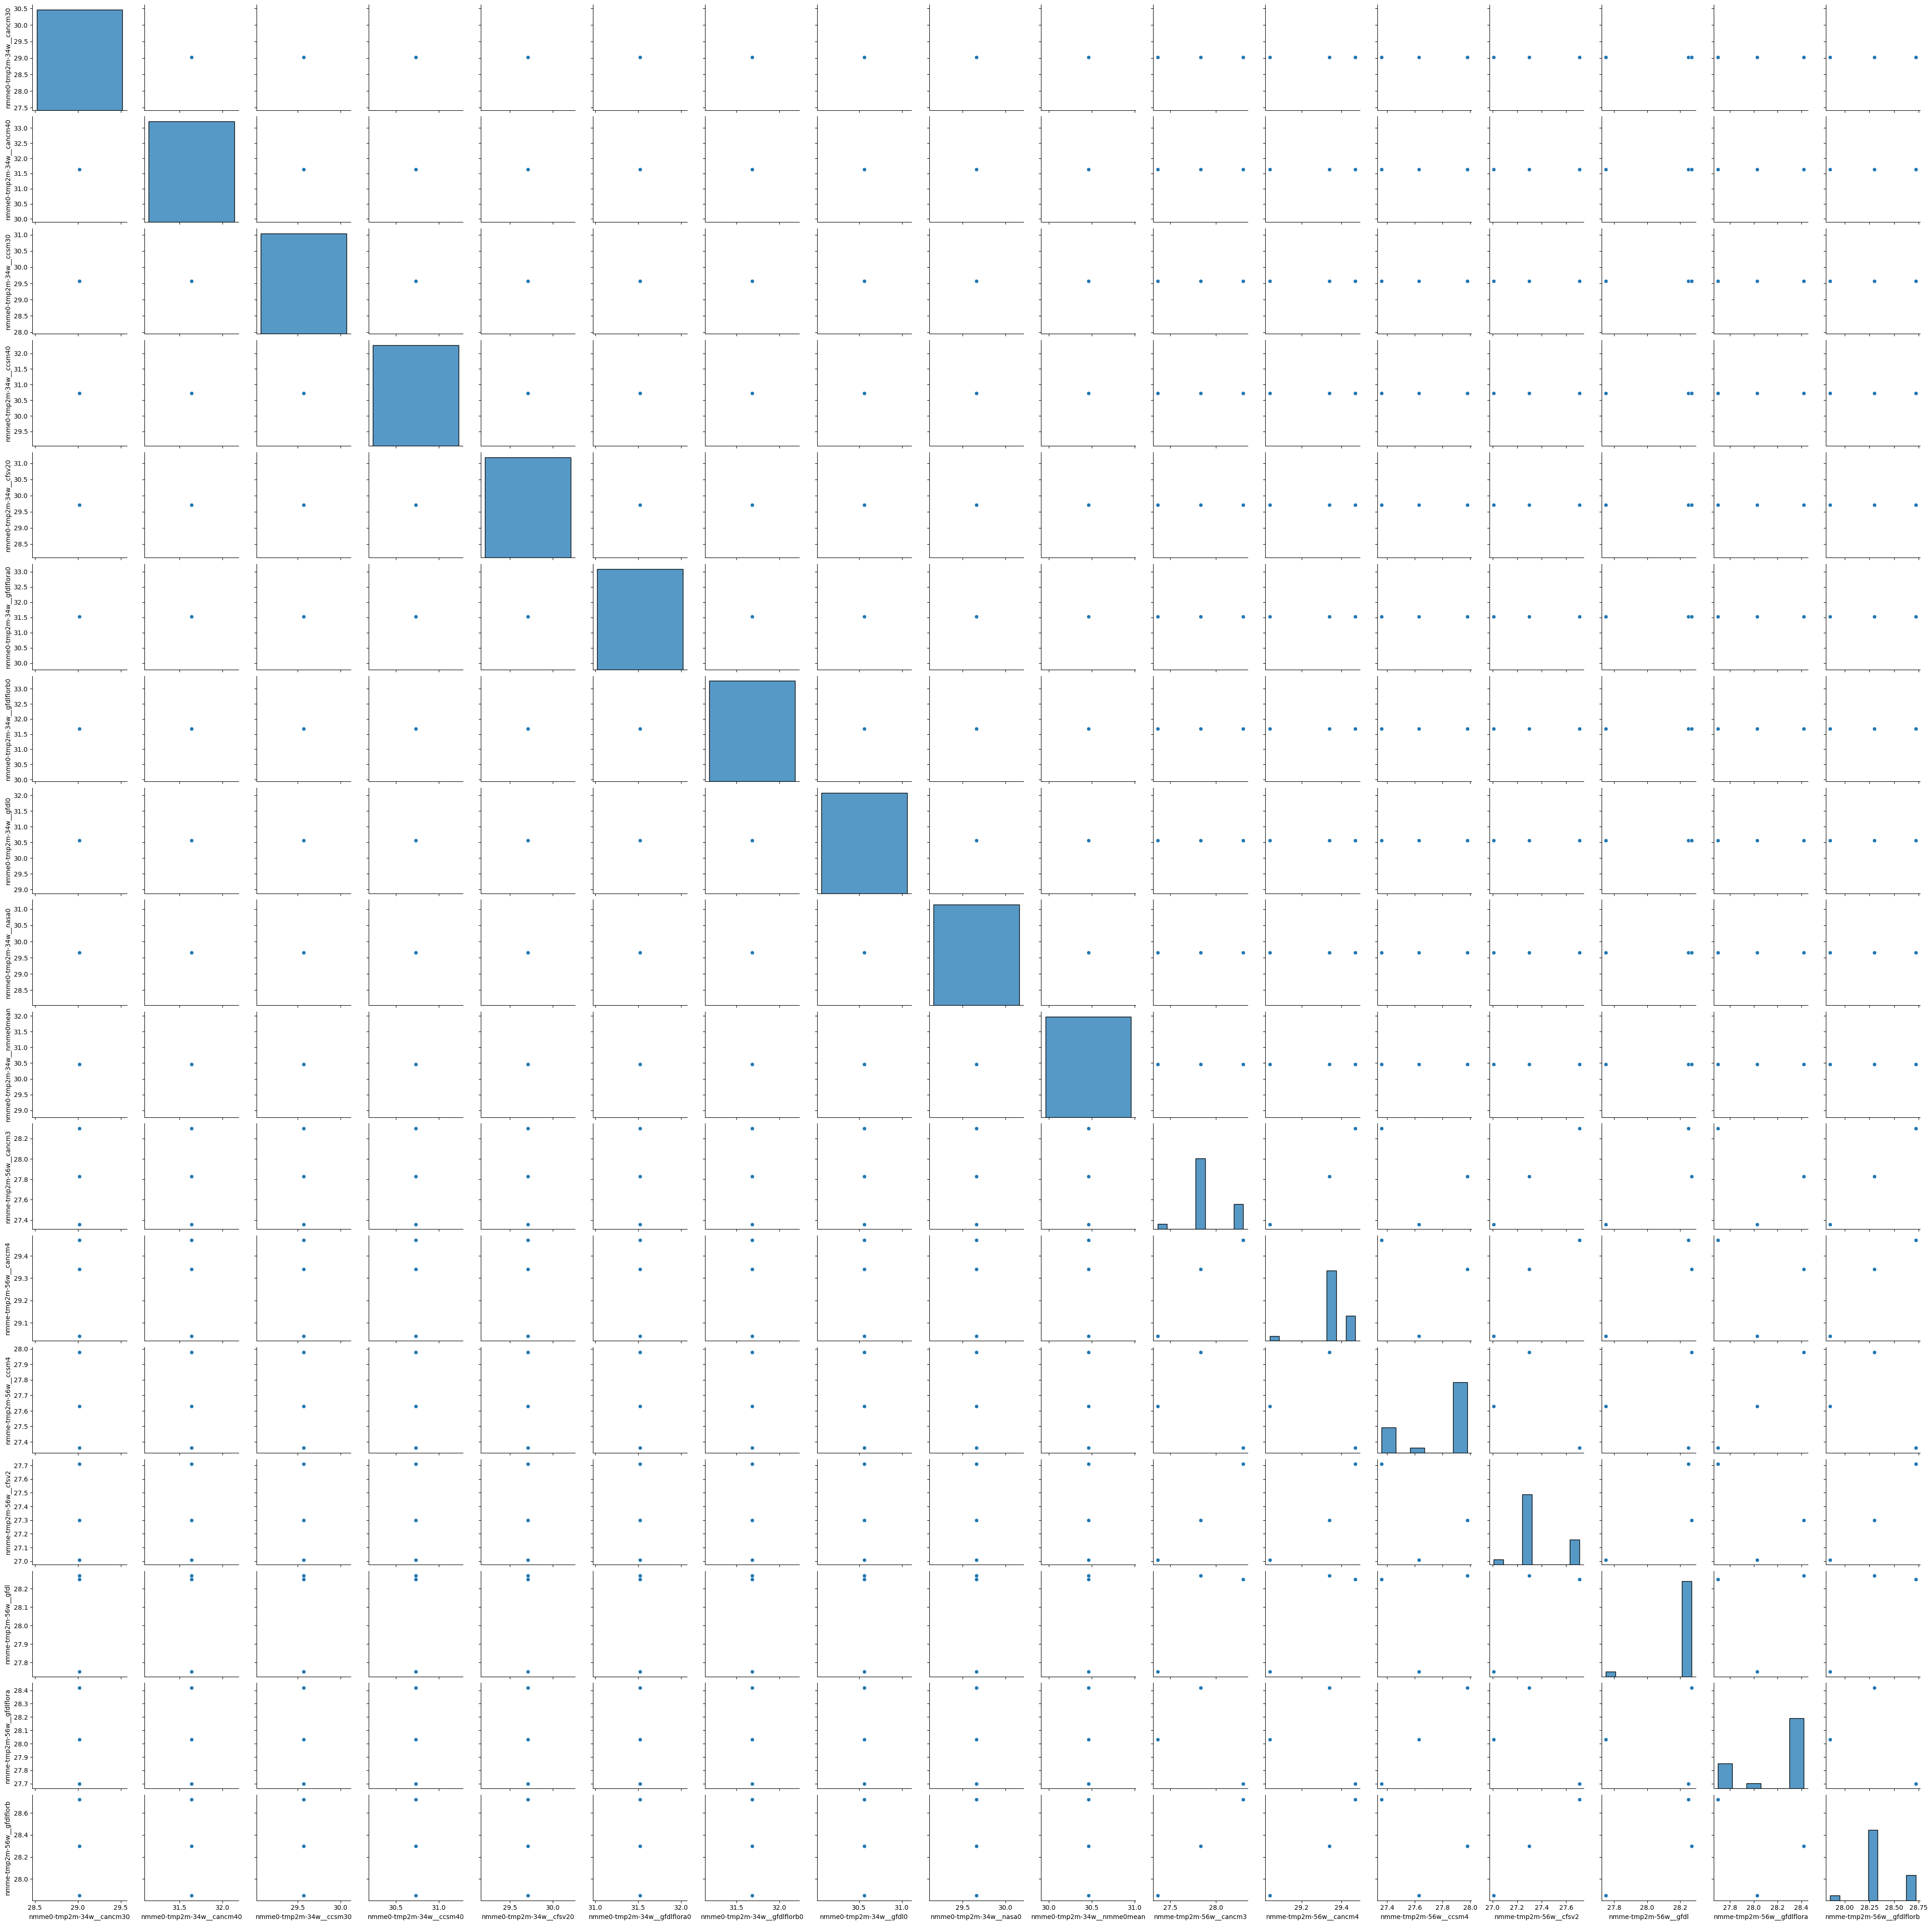

In [38]:
# only For The First 20  Rows &  2 - 20 Columns 
sns.pairplot(DF_X.iloc[:20,2:20])

# Data Preproccessing :

In [39]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline



from feature_engine.scaling import MeanNormalizationScaler


import xgboost as xgb
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor

In [40]:
Categorical = DF_X.select_dtypes("object")
Categorical

,startdate,climateregions__climateregion
0,9/1/14,BSh
1,9/2/14,BSh
2,9/3/14,BSh
3,9/4/14,BSh
4,9/5/14,BSh
...,...,...
375729,8/27/16,Dfb
375730,8/28/16,Dfb
375731,8/29/16,Dfb
375732,8/30/16,Dfb


In [41]:
Cat_Col = ["climateregions__climateregion"]

- Fixing The Date :

In [42]:
DF_X['startdate'] = pd.to_datetime(DF_X['startdate'],format="%m/%d/%y")

In [43]:
DF_X['year'] = DF_X['startdate'].dt.year
DF_X['month'] = DF_X['startdate'].dt.month
DF_X['day'] = DF_X['startdate'].dt.day
DF_X = DF_X.drop('startdate', axis=1)

#### encoding the categorical feature in the train and test data set
 -  OneHotEncoder : 

In [44]:
climateregions = DF_X["climateregions__climateregion"]

In [45]:
climateregions_Enc = pd.get_dummies(climateregions,dtype=int)

In [46]:
climateregions_Enc

,BSh,BSk,BWh,BWk,Cfa,Cfb,Csa,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
375730,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
375731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
375732,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
DF_X.drop(columns=["climateregions__climateregion"],inplace=True)

In [48]:
X_PreProceesed = pd.concat([DF_X,climateregions_Enc],axis=1)

In [49]:
X_PreProceesed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 216 entries, lat to Dwb
dtypes: float64(195), int32(3), int64(18)
memory usage: 614.9 MB


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_PreProceesed, DF_y, test_size=0.4, random_state=42)
X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

# Feature Engineering :

In [51]:
FE_PipeLine = Pipeline([
("MeanNormalizationScaler",MeanNormalizationScaler())
])

In [52]:
FE_PipeLine.fit(X_train,y_train)

,steps,"[('MeanNormalizationScaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,variables,None


# Modeling :
### BaseLine :

1. XGBoost : 

In [53]:
XGBoost_Reg = xgb.XGBRegressor()

In [54]:
XGBoost_Reg.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


2. CatBoost :

In [55]:
CatBoost_Reg = CatBoostRegressor()

In [56]:
CatBoost_Reg.fit(X_train,y_train)

Learning rate set to 0.088901
0:	learn: 9.0967445	total: 185ms	remaining: 3m 4s
1:	learn: 8.4104810	total: 238ms	remaining: 1m 58s
2:	learn: 7.7817532	total: 264ms	remaining: 1m 27s
3:	learn: 7.2165742	total: 289ms	remaining: 1m 11s
4:	learn: 6.7011497	total: 314ms	remaining: 1m 2s
5:	learn: 6.2390189	total: 340ms	remaining: 56.4s
6:	learn: 5.8149720	total: 365ms	remaining: 51.8s
7:	learn: 5.4386152	total: 392ms	remaining: 48.6s
8:	learn: 5.0992054	total: 417ms	remaining: 45.9s
9:	learn: 4.7841143	total: 443ms	remaining: 43.9s
10:	learn: 4.4984540	total: 469ms	remaining: 42.1s
11:	learn: 4.2445034	total: 495ms	remaining: 40.7s
12:	learn: 4.0155756	total: 520ms	remaining: 39.4s
13:	learn: 3.8120471	total: 547ms	remaining: 38.5s
14:	learn: 3.6270277	total: 571ms	remaining: 37.5s
15:	learn: 3.4574252	total: 596ms	remaining: 36.7s
16:	learn: 3.3030222	total: 621ms	remaining: 35.9s
17:	learn: 3.1618023	total: 647ms	remaining: 35.3s
18:	learn: 3.0417124	total: 671ms	remaining: 34.7s
19:	lear

3. LGBM : 

In [57]:
LGBM_Reg = LGBMRegressor()

In [58]:
LGBM_Reg.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


# Evaluation :
- Metric = RMSE


- Dummy Regressor : 9.8616
- XGBoost : 0.788
- CatBoost : 0.653
- LGBM :  1.007

In [59]:
Dummy_Reg = DummyRegressor()

In [60]:
Dummy_Reg.fit(X_train,y_train)

,strategy,'mean'
,constant,None
,quantile,None


In [61]:
Y_true = y_test

In [62]:
Y_true.shape

(150294,)

For Dummy_Reg :

In [63]:
Y_Pred_Dum = Dummy_Reg.predict(X_test)

In [64]:
Y_Pred_Dum.shape

(150294,)

In [65]:
Result_Dum = root_mean_squared_error(Y_true,Y_Pred_Dum)

- For XGBoost : 

In [66]:
Y_Pred_Xg = XGBoost_Reg.predict(X_test)

In [67]:
Y_Pred_Xg.shape

(150294,)

In [68]:
Result_XG = root_mean_squared_error(Y_true,Y_Pred_Xg)

- For Catboost : 

In [69]:
Y_Pred_CB = CatBoost_Reg.predict(X_test)

In [70]:
Y_Pred_CB.shape

(150294,)

In [71]:
Result_CB = root_mean_squared_error(Y_true,Y_Pred_CB)

- For LGBM : 

In [72]:
Y_Pred_LGBM = LGBM_Reg.predict(X_test)

In [73]:
Y_Pred_LGBM.shape

(150294,)

In [74]:
Result_LGBM = root_mean_squared_error(Y_true,Y_Pred_LGBM)

In [75]:
print(f'RMSE ( Dummy Regressor ) : {Result_Dum:0.3f}')
print(f'RMSE ( XGBoost Regressor ) : {Result_XG:0.3f}')
print(f'RMSE ( CatBoost Regressor ) : {Result_CB:0.3f}')
print(f'RMSE ( LGBM Regressor ) : {Result_LGBM:0.3f}')

RMSE ( Dummy Regressor ) : 9.862
RMSE ( XGBoost Regressor ) : 0.789
RMSE ( CatBoost Regressor ) : 0.653
RMSE ( LGBM Regressor ) : 1.007


# Optuna Study 

---

###  XGBoost HP : 

| Parameter           | Type   | Default | Range       |
|---------------------|--------|---------|-------------|
| `max_depth`         | int    | 6       | [0, ∞]      |
| `min_child_weight`  | float  | 1       | [0, ∞]      |
| `subsample`         | float  | 1.0     | (0, 1]      |
| `colsample_bytree`  | float  | 1.0     | (0, 1]      |
| `learning_rate`     | float  | 0.5     | [0, 1]      |



###  CatBoost HP :

| Parameter       | Type   | Default  | Range / Notes        |
|-----------------|--------|----------|-----------------------|
| `learning_rate` | float  | 0.009    | (0.0, 1.0)           |
| `n_estimators`  | int    | 500      | Positive integer  [1, ∞)     |
| `eval_metric`   | string | auto     | `"RMSE"` in our case  |
| `random_seed`   | int    | 1        | Non-negative integer  [0, ∞) |


### LightGBM HP : 

| Parameter           | Type   | Default | Range / Notes              |
|---------------------|--------|---------|-----------------------------|
| `learning_rate`     | float  | 0.1     | (0.0, 1.0)                 |
| `max_depth`         | int    | -1      | int            |
| `num_leaves`        | int    | 64      | [1, 131072]                |
| `n_estimators`      | int    | 500     | Positive integer  [1, ∞)         |
| `bagging_fraction`  | float  | 0.9     | (0.0, 1.0]                 |
| `bagging_freq`      | int    | 1       | Non-negative integer [0, ∞)      |


In [76]:
import optuna

c:\WiDS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [77]:
def objective_XG(trial):

     HP_XGBoost = {
         "max_depth" : trial.suggest_int("max_depth",0,10),
         "min_child_weight" : trial.suggest_float("min_child_weight",0,10),
         "subsample" : trial.suggest_float("subsample",0.1,1),
         "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.1,1),
         "learning_rate" : trial.suggest_float("learning_rate", 0,1)
      }
     XGBoost_Reg = xgb.XGBRegressor(**HP_XGBoost)
     XGBoost_Reg.fit(X_train,y_train)
     Y_Pred_Xg = XGBoost_Reg.predict(X_test)
     Result_XG = root_mean_squared_error(Y_true,Y_Pred_Xg)
     return Result_XG

In [78]:
study_XG = optuna.create_study(direction='minimize')

[I 2025-09-24 05:09:26,917] A new study created in memory with name: no-name-1da248c0-5a9d-4cbb-88b1-7ae6e9245c3d


In [79]:
study_XG.optimize(objective_XG, n_trials=10)

[I 2025-09-24 05:09:31,268] Trial 0 finished with value: 7.284206959426415 and parameters: {'max_depth': 8, 'min_child_weight': 8.796124338440274, 'subsample': 0.17191099092318898, 'colsample_bytree': 0.901318237874246, 'learning_rate': 0.9924718885520675}. Best is trial 0 with value: 7.284206959426415.
[I 2025-09-24 05:09:38,932] Trial 1 finished with value: 1.118834758480317 and parameters: {'max_depth': 9, 'min_child_weight': 4.867471499553865, 'subsample': 0.31244726980201704, 'colsample_bytree': 0.849423914049088, 'learning_rate': 0.6560988794332747}. Best is trial 1 with value: 1.118834758480317.
[I 2025-09-24 05:09:48,633] Trial 2 finished with value: 0.799070346790928 and parameters: {'max_depth': 10, 'min_child_weight': 6.957302902990138, 'subsample': 0.24027947712259878, 'colsample_bytree': 0.9171009993477376, 'learning_rate': 0.3761647461576283}. Best is trial 2 with value: 0.799070346790928.
[I 2025-09-24 05:09:51,817] Trial 3 finished with value: 1.5886551484068507 and par

In [80]:
study_XG.best_params

{'max_depth': 10,
 'min_child_weight': 5.277377905287379,
 'subsample': 0.2535705979895978,
 'colsample_bytree': 0.7571410929806593,
 'learning_rate': 0.1923543699543918}

In [81]:
Best_XGboost = xgb.XGBRegressor(**study_XG.best_params )

In [82]:
Best_XGboost.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7571410929806593
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [83]:
Y_Pred_Xg2 = Best_XGboost.predict(X_test)

In [84]:
Result_XG2 = root_mean_squared_error(Y_true,Y_Pred_Xg2)

In [85]:
Result_XG2

0.6148081354987611

In [86]:
def objective_CB(trial):
 
   HP_CatBoost = {
       "iterations" : trial.suggest_int("iterations", 100, 1000),
    "learning_rate" : trial.suggest_float("learning_rate", 0,1),
    "random_seed": trial.suggest_int("random_seed",0,10)
   }
   CatBoost_Reg = CatBoostRegressor()
   CatBoost_Reg.fit(X_train,y_train)
   Y_Pred_CB = CatBoost_Reg.predict(X_test)
   Result_CB = root_mean_squared_error(Y_true,Y_Pred_CB)
   return Result_CB


In [87]:
# 3. Create a study object and optimize the objective function.
study_CB = optuna.create_study(direction='minimize')

[I 2025-09-24 05:10:39,123] A new study created in memory with name: no-name-d57eb453-7a51-441c-904e-2f64cbcc6846


In [88]:
study_CB.optimize(objective_CB, n_trials=10)

Learning rate set to 0.088901
0:	learn: 9.0967445	total: 31ms	remaining: 31s
1:	learn: 8.4104810	total: 66.7ms	remaining: 33.3s
2:	learn: 7.7817532	total: 98.6ms	remaining: 32.8s
3:	learn: 7.2165742	total: 129ms	remaining: 32.1s
4:	learn: 6.7011497	total: 160ms	remaining: 31.9s
5:	learn: 6.2390189	total: 192ms	remaining: 31.8s
6:	learn: 5.8149720	total: 225ms	remaining: 31.9s
7:	learn: 5.4386152	total: 259ms	remaining: 32.1s
8:	learn: 5.0992054	total: 289ms	remaining: 31.9s
9:	learn: 4.7841143	total: 319ms	remaining: 31.6s
10:	learn: 4.4984540	total: 349ms	remaining: 31.4s
11:	learn: 4.2445034	total: 380ms	remaining: 31.3s
12:	learn: 4.0155756	total: 410ms	remaining: 31.1s
13:	learn: 3.8120471	total: 440ms	remaining: 31s
14:	learn: 3.6270277	total: 470ms	remaining: 30.9s
15:	learn: 3.4574252	total: 500ms	remaining: 30.7s
16:	learn: 3.3030222	total: 529ms	remaining: 30.6s
17:	learn: 3.1618023	total: 558ms	remaining: 30.5s
18:	learn: 3.0417124	total: 588ms	remaining: 30.3s
19:	learn: 2.9

[I 2025-09-24 05:11:08,544] Trial 0 finished with value: 0.6534675275013262 and parameters: {'iterations': 115, 'learning_rate': 0.6641957233853603, 'random_seed': 1}. Best is trial 0 with value: 0.6534675275013262.


997:	learn: 0.6215907	total: 28.5s	remaining: 57.2ms
998:	learn: 0.6213387	total: 28.6s	remaining: 28.6ms
999:	learn: 0.6210529	total: 28.6s	remaining: 0us
Learning rate set to 0.088901
0:	learn: 9.0967445	total: 43.2ms	remaining: 43.1s
1:	learn: 8.4104810	total: 72.3ms	remaining: 36.1s
2:	learn: 7.7817532	total: 104ms	remaining: 34.4s
3:	learn: 7.2165742	total: 132ms	remaining: 32.9s
4:	learn: 6.7011497	total: 162ms	remaining: 32.3s
5:	learn: 6.2390189	total: 212ms	remaining: 35.2s
6:	learn: 5.8149720	total: 247ms	remaining: 35.1s
7:	learn: 5.4386152	total: 281ms	remaining: 34.9s
8:	learn: 5.0992054	total: 310ms	remaining: 34.1s
9:	learn: 4.7841143	total: 340ms	remaining: 33.6s
10:	learn: 4.4984540	total: 369ms	remaining: 33.1s
11:	learn: 4.2445034	total: 402ms	remaining: 33.1s
12:	learn: 4.0155756	total: 430ms	remaining: 32.7s
13:	learn: 3.8120471	total: 460ms	remaining: 32.4s
14:	learn: 3.6270277	total: 489ms	remaining: 32.1s
15:	learn: 3.4574252	total: 517ms	remaining: 31.8s
16:	le

[I 2025-09-24 05:11:37,412] Trial 1 finished with value: 0.6534675275013262 and parameters: {'iterations': 699, 'learning_rate': 0.22532109292738922, 'random_seed': 9}. Best is trial 0 with value: 0.6534675275013262.


999:	learn: 0.6210529	total: 28.1s	remaining: 0us
Learning rate set to 0.088901
0:	learn: 9.0967445	total: 35.5ms	remaining: 35.5s
1:	learn: 8.4104810	total: 70.3ms	remaining: 35.1s
2:	learn: 7.7817532	total: 101ms	remaining: 33.5s
3:	learn: 7.2165742	total: 132ms	remaining: 32.9s
4:	learn: 6.7011497	total: 165ms	remaining: 32.7s
5:	learn: 6.2390189	total: 195ms	remaining: 32.2s
6:	learn: 5.8149720	total: 224ms	remaining: 31.8s
7:	learn: 5.4386152	total: 256ms	remaining: 31.7s
8:	learn: 5.0992054	total: 287ms	remaining: 31.6s
9:	learn: 4.7841143	total: 318ms	remaining: 31.4s
10:	learn: 4.4984540	total: 348ms	remaining: 31.3s
11:	learn: 4.2445034	total: 380ms	remaining: 31.3s
12:	learn: 4.0155756	total: 410ms	remaining: 31.1s
13:	learn: 3.8120471	total: 441ms	remaining: 31.1s
14:	learn: 3.6270277	total: 472ms	remaining: 31s
15:	learn: 3.4574252	total: 503ms	remaining: 30.9s
16:	learn: 3.3030222	total: 532ms	remaining: 30.8s
17:	learn: 3.1618023	total: 564ms	remaining: 30.8s
18:	learn: 3

[I 2025-09-24 05:12:05,696] Trial 2 finished with value: 0.6534675275013262 and parameters: {'iterations': 176, 'learning_rate': 0.037982055907039625, 'random_seed': 9}. Best is trial 0 with value: 0.6534675275013262.


Learning rate set to 0.088901
0:	learn: 9.0967445	total: 28.2ms	remaining: 28.2s
1:	learn: 8.4104810	total: 59.1ms	remaining: 29.5s
2:	learn: 7.7817532	total: 89.3ms	remaining: 29.7s
3:	learn: 7.2165742	total: 118ms	remaining: 29.5s
4:	learn: 6.7011497	total: 149ms	remaining: 29.7s
5:	learn: 6.2390189	total: 179ms	remaining: 29.7s
6:	learn: 5.8149720	total: 210ms	remaining: 29.8s
7:	learn: 5.4386152	total: 241ms	remaining: 29.9s
8:	learn: 5.0992054	total: 270ms	remaining: 29.8s
9:	learn: 4.7841143	total: 301ms	remaining: 29.8s
10:	learn: 4.4984540	total: 330ms	remaining: 29.7s
11:	learn: 4.2445034	total: 361ms	remaining: 29.7s
12:	learn: 4.0155756	total: 389ms	remaining: 29.5s
13:	learn: 3.8120471	total: 419ms	remaining: 29.5s
14:	learn: 3.6270277	total: 448ms	remaining: 29.4s
15:	learn: 3.4574252	total: 477ms	remaining: 29.3s
16:	learn: 3.3030222	total: 507ms	remaining: 29.3s
17:	learn: 3.1618023	total: 537ms	remaining: 29.3s
18:	learn: 3.0417124	total: 565ms	remaining: 29.2s
19:	lear

[I 2025-09-24 05:12:34,168] Trial 3 finished with value: 0.6534675275013262 and parameters: {'iterations': 577, 'learning_rate': 0.7987422733518899, 'random_seed': 7}. Best is trial 0 with value: 0.6534675275013262.


Learning rate set to 0.088901
0:	learn: 9.0967445	total: 29.1ms	remaining: 29s
1:	learn: 8.4104810	total: 61.5ms	remaining: 30.7s
2:	learn: 7.7817532	total: 91.4ms	remaining: 30.4s
3:	learn: 7.2165742	total: 120ms	remaining: 29.9s
4:	learn: 6.7011497	total: 151ms	remaining: 30s
5:	learn: 6.2390189	total: 181ms	remaining: 30s
6:	learn: 5.8149720	total: 212ms	remaining: 30s
7:	learn: 5.4386152	total: 243ms	remaining: 30.2s
8:	learn: 5.0992054	total: 273ms	remaining: 30s
9:	learn: 4.7841143	total: 303ms	remaining: 30s
10:	learn: 4.4984540	total: 332ms	remaining: 29.8s
11:	learn: 4.2445034	total: 361ms	remaining: 29.7s
12:	learn: 4.0155756	total: 391ms	remaining: 29.7s
13:	learn: 3.8120471	total: 422ms	remaining: 29.7s
14:	learn: 3.6270277	total: 452ms	remaining: 29.7s
15:	learn: 3.4574252	total: 481ms	remaining: 29.6s
16:	learn: 3.3030222	total: 510ms	remaining: 29.5s
17:	learn: 3.1618023	total: 540ms	remaining: 29.5s
18:	learn: 3.0417124	total: 569ms	remaining: 29.4s
19:	learn: 2.9312731

[I 2025-09-24 05:13:03,951] Trial 4 finished with value: 0.6534675275013262 and parameters: {'iterations': 250, 'learning_rate': 0.09508209339907536, 'random_seed': 8}. Best is trial 0 with value: 0.6534675275013262.


Learning rate set to 0.088901
0:	learn: 9.0967445	total: 29.3ms	remaining: 29.3s
1:	learn: 8.4104810	total: 63.1ms	remaining: 31.5s
2:	learn: 7.7817532	total: 94.4ms	remaining: 31.4s
3:	learn: 7.2165742	total: 124ms	remaining: 30.8s
4:	learn: 6.7011497	total: 155ms	remaining: 30.8s
5:	learn: 6.2390189	total: 188ms	remaining: 31.1s
6:	learn: 5.8149720	total: 221ms	remaining: 31.3s
7:	learn: 5.4386152	total: 253ms	remaining: 31.4s
8:	learn: 5.0992054	total: 282ms	remaining: 31.1s
9:	learn: 4.7841143	total: 313ms	remaining: 31s
10:	learn: 4.4984540	total: 344ms	remaining: 30.9s
11:	learn: 4.2445034	total: 375ms	remaining: 30.8s
12:	learn: 4.0155756	total: 405ms	remaining: 30.7s
13:	learn: 3.8120471	total: 439ms	remaining: 30.9s
14:	learn: 3.6270277	total: 470ms	remaining: 30.8s
15:	learn: 3.4574252	total: 501ms	remaining: 30.8s
16:	learn: 3.3030222	total: 534ms	remaining: 30.9s
17:	learn: 3.1618023	total: 565ms	remaining: 30.8s
18:	learn: 3.0417124	total: 595ms	remaining: 30.7s
19:	learn:

[I 2025-09-24 05:13:32,902] Trial 5 finished with value: 0.6534675275013262 and parameters: {'iterations': 700, 'learning_rate': 0.20239243319855627, 'random_seed': 5}. Best is trial 0 with value: 0.6534675275013262.


Learning rate set to 0.088901
0:	learn: 9.0967445	total: 31.6ms	remaining: 31.6s
1:	learn: 8.4104810	total: 65.2ms	remaining: 32.5s
2:	learn: 7.7817532	total: 95.5ms	remaining: 31.8s
3:	learn: 7.2165742	total: 124ms	remaining: 30.9s
4:	learn: 6.7011497	total: 155ms	remaining: 30.8s
5:	learn: 6.2390189	total: 190ms	remaining: 31.5s
6:	learn: 5.8149720	total: 222ms	remaining: 31.6s
7:	learn: 5.4386152	total: 254ms	remaining: 31.5s
8:	learn: 5.0992054	total: 283ms	remaining: 31.2s
9:	learn: 4.7841143	total: 314ms	remaining: 31.1s
10:	learn: 4.4984540	total: 344ms	remaining: 30.9s
11:	learn: 4.2445034	total: 374ms	remaining: 30.8s
12:	learn: 4.0155756	total: 408ms	remaining: 30.9s
13:	learn: 3.8120471	total: 438ms	remaining: 30.8s
14:	learn: 3.6270277	total: 468ms	remaining: 30.7s
15:	learn: 3.4574252	total: 498ms	remaining: 30.6s
16:	learn: 3.3030222	total: 535ms	remaining: 30.9s
17:	learn: 3.1618023	total: 581ms	remaining: 31.7s
18:	learn: 3.0417124	total: 615ms	remaining: 31.8s
19:	lear

[I 2025-09-24 05:14:01,964] Trial 6 finished with value: 0.6534675275013262 and parameters: {'iterations': 861, 'learning_rate': 0.7180052684134581, 'random_seed': 0}. Best is trial 0 with value: 0.6534675275013262.


997:	learn: 0.6215907	total: 28.2s	remaining: 56.5ms
998:	learn: 0.6213387	total: 28.2s	remaining: 28.3ms
999:	learn: 0.6210529	total: 28.3s	remaining: 0us
Learning rate set to 0.088901
0:	learn: 9.0967445	total: 27.9ms	remaining: 27.9s
1:	learn: 8.4104810	total: 62.8ms	remaining: 31.4s
2:	learn: 7.7817532	total: 95.4ms	remaining: 31.7s
3:	learn: 7.2165742	total: 124ms	remaining: 30.9s
4:	learn: 6.7011497	total: 154ms	remaining: 30.7s
5:	learn: 6.2390189	total: 187ms	remaining: 30.9s
6:	learn: 5.8149720	total: 218ms	remaining: 31s
7:	learn: 5.4386152	total: 251ms	remaining: 31.1s
8:	learn: 5.0992054	total: 281ms	remaining: 30.9s
9:	learn: 4.7841143	total: 311ms	remaining: 30.8s
10:	learn: 4.4984540	total: 341ms	remaining: 30.7s
11:	learn: 4.2445034	total: 371ms	remaining: 30.5s
12:	learn: 4.0155756	total: 401ms	remaining: 30.5s
13:	learn: 3.8120471	total: 435ms	remaining: 30.7s
14:	learn: 3.6270277	total: 465ms	remaining: 30.6s
15:	learn: 3.4574252	total: 495ms	remaining: 30.4s
16:	lea

[I 2025-09-24 05:14:31,058] Trial 7 finished with value: 0.6534675275013262 and parameters: {'iterations': 765, 'learning_rate': 0.6397227147870446, 'random_seed': 2}. Best is trial 0 with value: 0.6534675275013262.


997:	learn: 0.6215907	total: 28.2s	remaining: 56.6ms
998:	learn: 0.6213387	total: 28.3s	remaining: 28.3ms
999:	learn: 0.6210529	total: 28.3s	remaining: 0us
Learning rate set to 0.088901
0:	learn: 9.0967445	total: 51.3ms	remaining: 51.3s
1:	learn: 8.4104810	total: 85.7ms	remaining: 42.8s
2:	learn: 7.7817532	total: 112ms	remaining: 37.3s
3:	learn: 7.2165742	total: 143ms	remaining: 35.7s
4:	learn: 6.7011497	total: 174ms	remaining: 34.6s
5:	learn: 6.2390189	total: 208ms	remaining: 34.4s
6:	learn: 5.8149720	total: 238ms	remaining: 33.7s
7:	learn: 5.4386152	total: 270ms	remaining: 33.5s
8:	learn: 5.0992054	total: 301ms	remaining: 33.2s
9:	learn: 4.7841143	total: 332ms	remaining: 32.9s
10:	learn: 4.4984540	total: 361ms	remaining: 32.5s
11:	learn: 4.2445034	total: 394ms	remaining: 32.4s
12:	learn: 4.0155756	total: 428ms	remaining: 32.5s
13:	learn: 3.8120471	total: 460ms	remaining: 32.4s
14:	learn: 3.6270277	total: 490ms	remaining: 32.2s
15:	learn: 3.4574252	total: 520ms	remaining: 32s
16:	lear

[I 2025-09-24 05:15:03,684] Trial 8 finished with value: 0.6534675275013262 and parameters: {'iterations': 829, 'learning_rate': 0.8492098534875218, 'random_seed': 5}. Best is trial 0 with value: 0.6534675275013262.


Learning rate set to 0.088901
0:	learn: 9.0967445	total: 29.4ms	remaining: 29.3s
1:	learn: 8.4104810	total: 62.1ms	remaining: 31s
2:	learn: 7.7817532	total: 93.3ms	remaining: 31s
3:	learn: 7.2165742	total: 124ms	remaining: 30.8s
4:	learn: 6.7011497	total: 156ms	remaining: 31.1s
5:	learn: 6.2390189	total: 187ms	remaining: 31s
6:	learn: 5.8149720	total: 218ms	remaining: 30.9s
7:	learn: 5.4386152	total: 252ms	remaining: 31.3s
8:	learn: 5.0992054	total: 283ms	remaining: 31.2s
9:	learn: 4.7841143	total: 315ms	remaining: 31.2s
10:	learn: 4.4984540	total: 346ms	remaining: 31.1s
11:	learn: 4.2445034	total: 377ms	remaining: 31s
12:	learn: 4.0155756	total: 407ms	remaining: 30.9s
13:	learn: 3.8120471	total: 438ms	remaining: 30.9s
14:	learn: 3.6270277	total: 470ms	remaining: 30.9s
15:	learn: 3.4574252	total: 500ms	remaining: 30.8s
16:	learn: 3.3030222	total: 531ms	remaining: 30.7s
17:	learn: 3.1618023	total: 564ms	remaining: 30.8s
18:	learn: 3.0417124	total: 596ms	remaining: 30.8s
19:	learn: 2.931

[I 2025-09-24 05:15:34,957] Trial 9 finished with value: 0.6534675275013262 and parameters: {'iterations': 714, 'learning_rate': 0.9327554345335005, 'random_seed': 9}. Best is trial 0 with value: 0.6534675275013262.


In [89]:
study_CB.best_params

{'iterations': 115, 'learning_rate': 0.6641957233853603, 'random_seed': 1}

In [90]:
Best_CatBoost =  CatBoostRegressor(** study_CB.best_params)

In [91]:
Best_CatBoost.fit(X_train,y_train)

0:	learn: 4.6930095	total: 30.5ms	remaining: 3.48s
1:	learn: 3.2119223	total: 62.1ms	remaining: 3.51s
2:	learn: 2.6478907	total: 96.3ms	remaining: 3.6s
3:	learn: 2.4186953	total: 126ms	remaining: 3.49s
4:	learn: 2.2927322	total: 154ms	remaining: 3.4s
5:	learn: 2.1839272	total: 183ms	remaining: 3.33s
6:	learn: 2.0899543	total: 215ms	remaining: 3.32s
7:	learn: 2.0263945	total: 243ms	remaining: 3.25s
8:	learn: 1.9792451	total: 271ms	remaining: 3.19s
9:	learn: 1.9226759	total: 298ms	remaining: 3.12s
10:	learn: 1.8908383	total: 321ms	remaining: 3.04s
11:	learn: 1.8251911	total: 351ms	remaining: 3.01s
12:	learn: 1.7626127	total: 382ms	remaining: 3s
13:	learn: 1.7255297	total: 412ms	remaining: 2.97s
14:	learn: 1.6910875	total: 449ms	remaining: 2.99s
15:	learn: 1.6627066	total: 477ms	remaining: 2.95s
16:	learn: 1.6405669	total: 502ms	remaining: 2.89s
17:	learn: 1.6241850	total: 528ms	remaining: 2.84s
18:	learn: 1.5964151	total: 553ms	remaining: 2.8s
19:	learn: 1.5686175	total: 582ms	remaining:

In [92]:
Y_Pred_CB2 = Best_CatBoost.predict(X_test)

In [93]:
Result_CB2 = root_mean_squared_error(Y_true,Y_Pred_CB2)

In [94]:
Result_CB2

0.9183034557874261

In [95]:
def objective_Light(trial):
 
   HP_LGBM = {
    "learning_rate" : trial.suggest_float("learning_rate", 0.01,0.3),
    "max_depth" :trial.suggest_int("max_depth", 3, 15),
    "num_leaves": trial.suggest_int("max_depth", 16, 256),
   "n_estimators" : trial.suggest_int("n_estimators", 100, 1000),
    "bagging_freq": trial.suggest_int("bagging_freq",1,10),
     "bagging_fraction" : trial.suggest_float("bagging_fraction", 0.5,0.95)
   }
   LGBM_Reg = LGBMRegressor()
   LGBM_Reg.fit(X_train,y_train)
   Y_Pred_LGBM = LGBM_Reg.predict(X_test)
   Result_LGBM = root_mean_squared_error(Y_true,Y_Pred_LGBM)
   return Result_LGBM
   

In [96]:
study_LGBM = optuna.create_study(direction='minimize')

[I 2025-09-24 05:15:38,870] A new study created in memory with name: no-name-53a77f8d-4876-4275-ab88-b1ea409beaa5


In [97]:
study_LGBM.optimize(objective_Light, n_trials=10)

c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:15:43,102] Trial 0 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.14303936761413824, 'max_depth': 6, 'n_estimators': 651, 'bagging_freq': 7, 'bagging_fraction': 0.5273516227981736}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:15:47,834] Trial 1 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.16964009402045332, 'max_depth': 14, 'n_estimators': 940, 'bagging_freq': 10, 'bagging_fraction': 0.8701532022254114}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:15:51,915] Trial 2 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.10714328965160648, 'max_depth': 5, 'n_estimators': 995, 'bagging_freq': 7, 'bagging_fraction': 0.756906699887785}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:15:55,923] Trial 3 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.2169971089473649, 'max_depth': 11, 'n_estimators': 514, 'bagging_freq': 7, 'bagging_fraction': 0.6266816425269774}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:15:59,885] Trial 4 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.29127244358166726, 'max_depth': 10, 'n_estimators': 113, 'bagging_freq': 1, 'bagging_fraction': 0.6164215640380903}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:16:03,963] Trial 5 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.11656635447792892, 'max_depth': 10, 'n_estimators': 900, 'bagging_freq': 7, 'bagging_fraction': 0.6419729860111126}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:16:08,068] Trial 6 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.233118654821246, 'max_depth': 12, 'n_estimators': 655, 'bagging_freq': 7, 'bagging_fraction': 0.7934879505131207}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:16:12,095] Trial 7 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.18722514644941576, 'max_depth': 6, 'n_estimators': 100, 'bagging_freq': 10, 'bagging_fraction': 0.7759487039894604}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:16:16,152] Trial 8 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.027805746690533574, 'max_depth': 13, 'n_estimators': 560, 'bagging_freq': 8, 'bagging_fraction': 0.9315595777808915}. Best is trial 0 with value: 1.0069663465877758.
c:\WiDS\.venv\Lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "max_depth"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 3, 'high': 15}
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938


[I 2025-09-24 05:16:20,076] Trial 9 finished with value: 1.0069663465877758 and parameters: {'learning_rate': 0.22134360839242911, 'max_depth': 15, 'n_estimators': 690, 'bagging_freq': 8, 'bagging_fraction': 0.6519049337029956}. Best is trial 0 with value: 1.0069663465877758.


In [98]:
study_LGBM.best_params

{'learning_rate': 0.14303936761413824,
 'max_depth': 6,
 'n_estimators': 651,
 'bagging_freq': 7,
 'bagging_fraction': 0.5273516227981736}

In [99]:
Best_LGBM = LGBMRegressor(** study_LGBM.best_params )

In [100]:
Best_LGBM.fit(X_train,y_train)

[LightGBM] [Warning] bagging_fraction is set=0.5273516227981736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273516227981736
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5273516227981736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273516227981736
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48328
[LightGBM] [Info] Number of data points in the train set: 135264, number of used features: 216
[LightGBM] [Info] Start training from score 11.855938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.14303936761413824
,n_estimators,651
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [101]:
Y_Pred_LGBM2 = Best_LGBM.predict(X_test)

[LightGBM] [Warning] bagging_fraction is set=0.5273516227981736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273516227981736
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


In [102]:
Result_LGBM2 = root_mean_squared_error(Y_true,Y_Pred_LGBM2)

In [103]:
Result_LGBM2

0.5458877252661125

### - the Optimization of XGBoost take too long on VScode so i did that on Kaggle 

### After done the optuna Study Optimization, the best value For Hyperparameters :
#### - For XGBoost :
 *  max_depth = 10,
 *  min_child_weight = 5.277377905287379,
 *  subsample = 0.2535705979895978,
 *  colsample_bytree = 0.7571410929806593,
 *  learning_rate = 0.1923543699543918

 #### - For CatBoost : 
 *  iterations = 115,
 *  learning_rate = 0.6641957233853603, 
 *  random_seed = 1


 ####  - For Lightgbm : 
 * learning_rate = 0.14303936761413824,
 * max_depth =  6,
 * n_estimators = 651,
 * bagging_freq = 7,
 * bagging_fraction = 0.5273516227981736


## - RMSE ( XGBoost ) : 0.614808
## - RMSE ( CatBoost) : 0.918303
## - RMSE ( LightGBM ) : 0.545887